### EDA


##### Declarations


In [1]:
#Defining libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing helper functions
%run "helper_functions.ipynb"

In [3]:
#Setting pandas option to disable scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 10000)

In [4]:
#Input and output paths for all pickle files. To be used to load and save these files
#Output
input_path="C:\\Users\\Anuvrat\\OneDrive\\Documents\\milestone1\\data\\inputs"
output_path="C:\\Users\\Anuvrat\\OneDrive\\Documents\\milestone1\\data\\inputs"

In [5]:
#Loading input pickle files
df_income_1901_edited=pd.read_pickle(input_path+"\\df_income_1901_edited.pkl")
df_health_outcomes_edited=pd.read_pickle(input_path+"\\df_health_outcomes_edited.pkl")
df_sdoh_edited=pd.read_pickle(input_path+"\\df_sdoh_edited.pkl")
df_state_politics_edited=pd.read_pickle(input_path+"\\df_state_politics_edited.pkl")
df_state_public_spend_edited=pd.read_pickle(input_path+"\\df_state_public_spend_edited.pkl")
df_acs_edited=pd.read_pickle(input_path+"\\df_acs_edited.pkl")
df_zip2st_edited=pd.read_pickle(input_path+"\\df_zip2st_edited.pkl")
df_combined=pd.read_pickle(input_path+"\\combined_dataset_anuvrat.pkl")

##### Checking basic file structure


In [9]:
#Naming dataframes
df_income_1901_edited.name="df_income_1901_edited"
df_health_outcomes_edited.name="df_health_outcomes_edited"
df_sdoh_edited.name="df_sdoh_edited"
df_state_politics_edited.name="df_state_politics_edited"
df_state_public_spend_edited.name="df_state_public_spend_edited"
df_acs_edited.name="df_acs_edited"
df_combined.name="df_combined"

#Checking shape for all input files
print("Shapes for all input files")
for df in [df_income_1901_edited, df_health_outcomes_edited, df_sdoh_edited, df_state_politics_edited, df_state_public_spend_edited, df_acs_edited, df_combined]:
    print (f"{df.name}: {df.shape}")

Shapes for all input files
df_income_1901_edited: (33774, 15)
df_health_outcomes_edited: (1169992, 13)
df_sdoh_edited: (291024, 5)
df_state_politics_edited: (57, 3)
df_state_public_spend_edited: (515, 6)
df_acs_edited: (33120, 15)
df_combined: (10310355, 41)


#### Exploratory Data Analysis for individual datasets


##### Census Income levels


In [11]:
df_income_1901_edited.head()

,Estimate Households Total,Percent Households lt 10k,Estimate Households Median income (dollars),Margin of Error Households Median income (dollars),Estimate Families Total,Percent Families lt 10k,Estimate Families Median income (dollars),Margin of Error Families Median income (dollars),Estimate Nonfamily households Total,Percent Nonfamily households lt 10k,Estimate Nonfamily households Median income (dollars),ZIP,Percent Households that are Families,Margin of Error Households Median income (percent),Margin of Error Families Median income (percent)
0,5341,27.1,17526.0,1697.0,3527,21.0,19628.0,2030.0,1814,45.6,10740.0,00601,0.660363,0.096828,0.103424
1,12777,24.3,20260.0,1494.0,8652,16.9,24126.0,1980.0,4125,42.1,13060.0,00602,0.677154,0.073741,0.082069
2,19624,31.0,17703.0,1223.0,12751,25.1,24062.0,1934.0,6873,45.2,11301.0,00603,0.649766,0.069084,0.080376
3,1948,25.9,19603.0,3497.0,1316,25.6,21439.0,4857.0,632,29.4,16716.0,00606,0.675565,0.178391,0.226550
4,8781,20.3,22796.0,1701.0,5872,17.1,26914.0,2712.0,2909,33.1,13634.0,00610,0.668717,0.074618,0.100765


###### Summary statistics


In [26]:
#% Missing values for each column. Function defined in helper functions notebook
perc_missing_num(df_income_1901_edited)

Number of records in dataset: 33774
Missing records summary:


,column,number_missing,percent_missing
0,Estimate Households Total,0,0.000000
4,Estimate Families Total,0,0.000000
8,Estimate Nonfamily households Total,0,0.000000
11,ZIP,0,0.000000
1,Percent Households lt 10k,956,2.830580
12,Percent Households that are Families,956,2.830580
5,Percent Families lt 10k,1262,3.736602
9,Percent Nonfamily households lt 10k,1691,5.006810
2,Estimate Households Median income (dollars),3153,9.335584
3,Margin of Error Households Median income (doll...,3244,9.605022


In [114]:
df_income_1901_edited.describe()

,Estimate Households Total,Percent Households lt 10k,Estimate Households Median income (dollars),Margin of Error Households Median income (dollars),Estimate Families Total,Percent Families lt 10k,Estimate Families Median income (dollars),Margin of Error Families Median income (dollars),Estimate Nonfamily households Total,Percent Nonfamily households lt 10k,Estimate Nonfamily households Median income (dollars),Percent Households that are Families,Margin of Error Households Median income (percent),Margin of Error Families Median income (percent)
count,33774.000000,32818.000000,30621.000000,30530.000000,33774.000000,32512.000000,30139.000000,29935.000000,33774.000000,32083.000000,27403.000000,32818.000000,30530.000000,29935.000000
mean,3758.964174,5.135136,73132.624767,15066.484376,2434.663291,3.213866,89208.005674,18375.030199,1324.300882,9.732874,43412.504507,0.662517,0.221444,0.222303
std,5552.161917,6.693621,31359.567626,14356.760701,3623.890067,5.407816,36228.614638,16702.223239,2171.447205,11.419375,20351.894849,0.148250,0.187011,0.184583
min,0.000000,0.000000,2500.000000,252.000000,0.000000,0.000000,2500.000000,215.000000,0.000000,0.000000,2500.000000,0.000000,0.003049,0.002167
25%,241.000000,1.800000,53466.000000,6447.000000,160.000000,0.000000,66250.000000,8108.500000,75.000000,3.200000,30000.000000,0.597828,0.092079,0.094655
50%,1011.000000,3.700000,66993.000000,10696.000000,684.000000,1.800000,81974.000000,13180.000000,313.000000,7.300000,39830.000000,0.674181,0.154844,0.157538
75%,5096.750000,6.400000,85313.000000,18439.750000,3303.750000,4.000000,103110.500000,22590.500000,1634.000000,12.400000,52500.000000,0.745763,0.282406,0.283206
max,41653.000000,100.000000,250000.000000,225644.000000,35484.000000,100.000000,250000.000000,226633.000000,26830.000000,100.000000,250000.000000,1.000000,0.999845,0.999650


Insights:

<ol>
<li>250K seems to be the limit set for any any ZIP's max income (household, family, nonfamily).</li>
<li>Very little variation in 'Percent Households that are Families' with IQR of 0.75-0.60=0.15 only. It may not be usable.</li>
</ol>


###### Histograms to see distributions


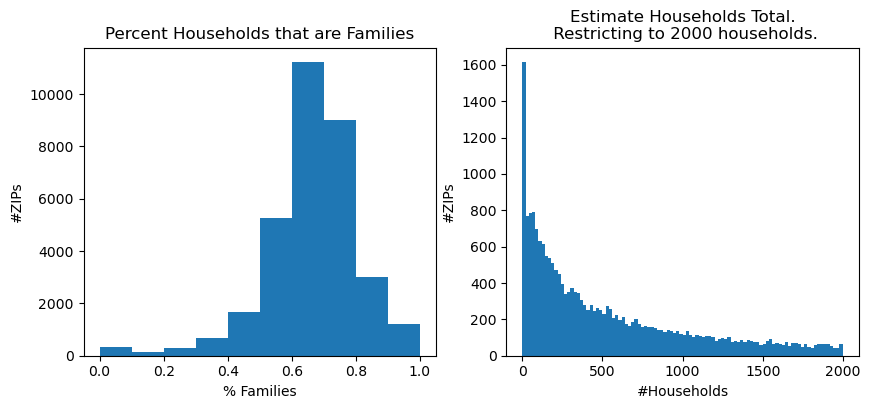

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(df_income_1901_edited['Percent Households that are Families'])
ax2.hist(df_income_1901_edited[df_income_1901_edited['Estimate Households Total']<2000]['Estimate Households Total'], bins=100, histtype='stepfilled')
ax1.set_title("Percent Households that are Families")
ax2.set_title("Estimate Households Total.\n Restricting to 2000 households.")
ax1.set_xlabel("% Families")
ax1.set_ylabel("#ZIPs")
ax2.set_xlabel("#Households")
ax2.set_ylabel("#ZIPs");

Insights:

<ol>
<li>We see a good spread slighthly left-skewed histogram for % households that are families.</li>
<li>The histogram centers around 0.7-0.8.</li>
<li>This can be a potential feature to look at.</li>
</ol>


Text(0, 0.5, '#ZIPs')

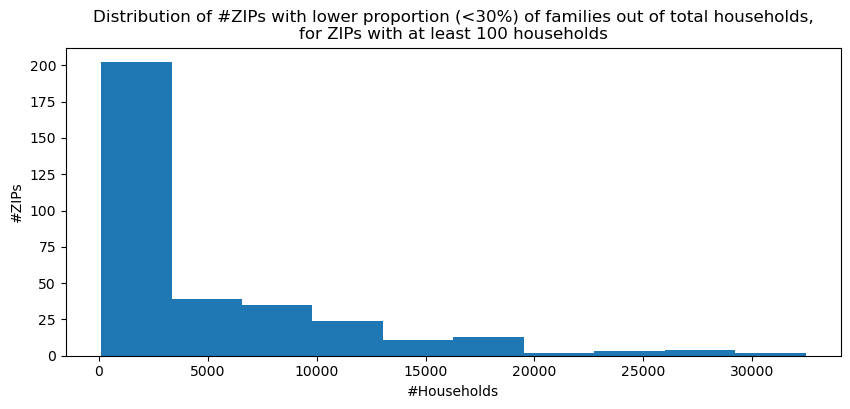

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.hist(df_income_1901_edited[(df_income_1901_edited['Percent Households that are Families']<0.3) & 
                      (df_income_1901_edited['Estimate Households Total'] >=100)]['Estimate Households Total'])
ax.set_title("Distribution of #ZIPs with lower proportion (<30%) of families out of total households,\nfor ZIPs with at least 100 households");
ax.set_xlabel("#Households")
ax.set_ylabel("#ZIPs")

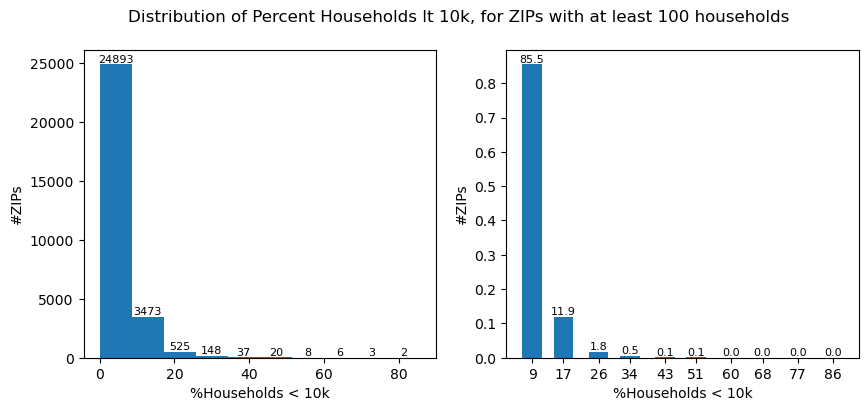

In [14]:
#Histogram: Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
counts, bins, bars = ax1.hist(df_income_1901_edited[df_income_1901_edited['Estimate Households Total'] >=100]['Percent Households lt 10k'])
#ax1.set_title("Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households");
ax1.set_xlabel("%Households < 10k")
ax1.set_ylabel("#ZIPs")
ax1.bar_label(bars, fontsize=8)

#Creating dataset for barchart
tmp_lt_10k=pd.DataFrame({'counts':counts, 'bins_max':np.round(bins[1:],0), 'per':counts/counts.sum()})
tmp_lt_10k['bins']=tmp_lt_10k['bins_max'].astype('string')
for _ in sorted(np.arange(len(tmp_lt_10k.bins)), key=lambda x: -x): 
    if _==0:
        tmp_lt_10k.loc[_,'bins']='0-'+str(np.round(tmp_lt_10k.loc[_,'bins_max']))
    else:
        tmp_lt_10k.loc[_,'bins']=str(np.round(tmp_lt_10k.loc[_-1,'bins_max']))+'-'+str(np.round(tmp_lt_10k.loc[_,'bins_max']))

#Bar-chart: Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households
ax2.bar(x=tmp_lt_10k.bins_max, height=tmp_lt_10k.per, width=5, label=tmp_lt_10k.per)
#ax2.set_title("Distribution of Percent Households lt 10k,\nfor ZIPs with at least 100 households");
ax2.set_xlabel("%Households < 10k")
ax2.set_ylabel("#ZIPs")
ax2.set_xticks(tmp_lt_10k.bins_max)

rects = ax2.patches

# Make some labels.
labels = [np.round(100*tmp_lt_10k.loc[i, 'per'],1) for i in np.arange(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2, height *1, label, ha="center", va="bottom", fontsize=8
    )

plt.suptitle("Distribution of Percent Households lt 10k, for ZIPs with at least 100 households")
plt.show();

Insights:

<ol>
<li>Only ~15%(100-85.5) ZIPs have more than 10% households earning less than $10K per annum. </li>
<li>Though this variable may not have a wide spread and as such may not be usable for correlations, etc.; we can probably form two groups of ZIPs: one with &gt20% households earning less than $10K and another with &lt5% households earning less than $10k. This may yield some interesting results. </li>
</ol>


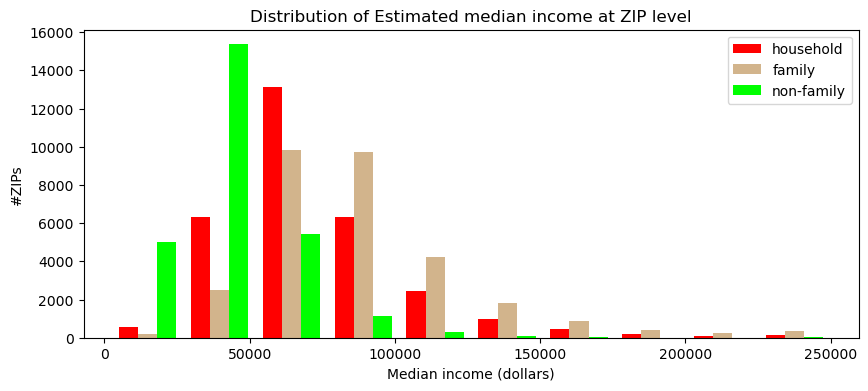

In [15]:
colors = ['red', 'tan', 'lime']
legend_labels = ['household', 'family', 'non-family']

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.hist(df_income_1901_edited[['Estimate Households Median income (dollars)', 
                               'Estimate Families Median income (dollars)', 'Estimate Nonfamily households Median income (dollars)']], 
                               histtype='bar', color=colors, label=legend_labels)
ax.set_xlabel("Median income (dollars)")
ax.set_ylabel("#ZIPs")
ax.set_title("Distribution of Estimated median income at ZIP level")
ax.legend(prop={'size': 10});

Insights:

<ol>
<li>Families have higher median income than non-family Households looking at the histogram. Hypothesis (not fact): This may be due to higher single earning population among non-family households. Further investigation can find how the data is being reported i.e. is income averaged at the family unit level or summed up when reporting. </li>
<li>Most non-family households earn &lt50K while family households earn closer to 100K. This may add some fire to the hypothesis given in #1 above.  </li>
<li>This may be a good variable to consider looking at the wide distribution in the histogram. </li>
</ol>


###### Margin of error


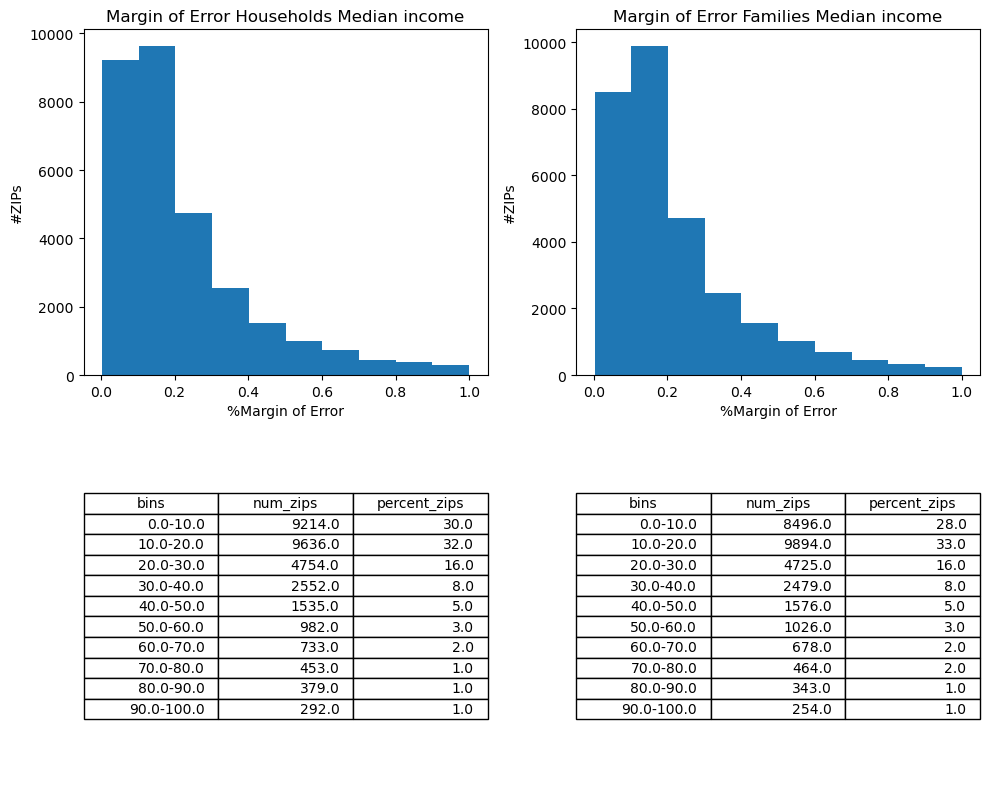

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
counts_h, bins_h, bars_h = ax1.hist(df_income_1901_edited['Margin of Error Households Median income (percent)'])
counts_f, bins_f, bars_f = ax2.hist(df_income_1901_edited['Margin of Error Families Median income (percent)'])                               
ax1.set_title("Margin of Error Households Median income")
ax2.set_title("Margin of Error Families Median income")
ax1.set_xlabel("%Margin of Error")
ax1.set_ylabel("#ZIPs")
ax2.set_xlabel("%Margin of Error")
ax2.set_ylabel("#ZIPs");

#Margin of error for households and families
moe_h=pd.DataFrame({'bins':[str(np.round(bins_h[_]*100))+"-"+str(np.round(bins_h[_+1]*100)) for _ in np.arange(len(bins_h)-1)], 'num_zips':counts_h,
              'percent_zips':np.round(counts_h/counts_h.sum()*100)})
moe_f=pd.DataFrame({'bins':[str(np.round(bins_f[_]*100))+"-"+str(np.round(bins_f[_+1]*100)) for _ in np.arange(len(bins_f)-1)], 'num_zips':counts_f,
              'percent_zips':np.round(counts_f/counts_f.sum()*100)})

ax3.table(cellText=moe_h.values, colLabels=moe_h.columns, loc='center')
ax4.table(cellText=moe_f.values, colLabels=moe_f.columns, loc='center')                               

ax3.axis('off')
ax3.axis('tight')
ax4.axis('off')
ax4.axis('tight')
fig.tight_layout()

plt.show()

In [96]:
tmp_tot_zips=df_income_1901_edited.shape[0]

tmp_moe_gt_50=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Households Median income (percent)']>0.5) & (df_income_1901_edited['Estimate Households Total']>0)].shape[0]
tmp_moe_gt_50_house_gt_100=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Households Median income (percent)']>0.5) &  (df_income_1901_edited['Estimate Households Total']>100)].shape[0]

print(f"Number of ZIPs (Total): {tmp_tot_zips}")
print(f"Number of ZIPs with >50% margin of error: {tmp_moe_gt_50} ({np.round(100*tmp_moe_gt_50/tmp_tot_zips, 1)}%)")
print(f"Number of ZIPs with >50% margin of error & >100 households: {tmp_moe_gt_50_house_gt_100} ({np.round(100*tmp_moe_gt_50_house_gt_100/tmp_tot_zips, 1)}%)")

tmp_tot_zips=df_income_1901_edited.shape[0]
tmp_moe_gt_50=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Families Median income (percent)']>0.5) & (df_income_1901_edited['Estimate Families Total']>0)].shape[0]
tmp_moe_gt_50_house_gt_100=df_income_1901_edited[(df_income_1901_edited[
    'Margin of Error Families Median income (percent)']>0.5) &  (df_income_1901_edited['Estimate Families Total']>100)].shape[0]

print(f"Number of ZIPs (Total): {tmp_tot_zips}")
print(f"Number of ZIPs with >50% margin of error (families): {tmp_moe_gt_50} ({np.round(100*tmp_moe_gt_50/tmp_tot_zips, 1)}%)")
print(f"Number of ZIPs with >50% margin of error (families) & >100 families: {tmp_moe_gt_50_house_gt_100} ({np.round(100*tmp_moe_gt_50_house_gt_100/tmp_tot_zips, 1)}%)")

Number of ZIPs (Total): 33774
Number of ZIPs with >50% margin of error: 2850 (8.4%)
Number of ZIPs with >50% margin of error & >100 households: 1941 (5.7%)
Number of ZIPs (Total): 33774
Number of ZIPs with >50% margin of error (families): 2772 (8.2%)
Number of ZIPs with >50% margin of error (families) & >100 families: 1657 (4.9%)


Insights:

<ol>
<li>8% ZIPs have more than 50% margin of error in the median household/families income. These ZIPs should be pressure tested if they tilt the balance of our insights.</li>
<li>These features are not to be used for analysis itself. But it gives us confidence that the data is reasonably clean for at least 92% ZIPs.</li>
</ol>


##### Health Outcomes


In [30]:
df_health_outcomes_edited.head()

,Year,LocationID,LocationName,Category,Measure,Data_Value_Unit,Data_Value,Data_Value_Type,TotalPopulation,Short_Question_Text,Geolocation,longitude,latitude
0,2021,01001,01001,Prevention,Current lack of health insurance among adults ...,%,4.100,Crude prevalence,16769,Health Insurance,POINT (-72.62581515 42.06255509),-72.626,42.063
1,2021,01001,01001,Health Outcomes,Arthritis among adults aged >=18 years,%,33.700,Crude prevalence,16769,Arthritis,POINT (-72.62581515 42.06255509),-72.626,42.063
2,2021,01001,01001,Health Risk Behaviors,Binge drinking among adults aged >=18 years,%,15.600,Crude prevalence,16769,Binge Drinking,POINT (-72.62581515 42.06255509),-72.626,42.063
3,2021,01001,01001,Health Outcomes,High blood pressure among adults aged >=18 years,%,33.800,Crude prevalence,16769,High Blood Pressure,POINT (-72.62581515 42.06255509),-72.626,42.063
4,2021,01001,01001,Prevention,Taking medicine for high blood pressure contro...,%,78.900,Crude prevalence,16769,Taking BP Medication,POINT (-72.62581515 42.06255509),-72.626,42.063


###### Summary statistics


In [27]:
#% Missing values for each column. Function defined in helper functions notebook
perc_missing_num(df_health_outcomes_edited)

Number of records in dataset: 1169992
Missing records summary:


,column,number_missing,percent_missing
0,Year,0,0.000000
1,LocationID,0,0.000000
2,LocationName,0,0.000000
3,Category,0,0.000000
4,Measure,0,0.000000
5,Data_Value_Unit,0,0.000000
7,Data_Value_Type,0,0.000000
8,TotalPopulation,0,0.000000
9,Short_Question_Text,0,0.000000
10,Geolocation,0,0.000000


In [29]:
df_health_outcomes_edited.describe()

,Data_Value,TotalPopulation,longitude,latitude
count,1169991.000,1169992.000,1169992.000,1169992.000
mean,28.829,9295.884,-91.270,39.164
std,25.149,13629.925,15.127,4.969
min,0.300,50.000,-176.631,19.070
25%,9.200,767.000,-97.363,35.861
50%,18.800,2781.000,-88.614,39.683
75%,39.000,12495.000,-80.229,42.200
max,97.800,113916.000,-67.006,71.271


In [75]:
df_health_outcomes_edited['Year'].unique()

<StringArray>
['2021', '2020']
Length: 2, dtype: string

In [78]:
#Counts by Measure, Category, Data Value Type, and Short_Question_Text
df_health_outcomes_edited[df_health_outcomes_edited['Year']=='2021'].groupby(
    ['Data_Value_Type', 'Category', 'Short_Question_Text', 'Measure']).size().reset_index(name='counts')

,Data_Value_Type,Category,Short_Question_Text,Measure,counts
0,Crude prevalence,Disability,Any Disability,Any disability among adults aged >=18 years,31435
1,Crude prevalence,Disability,Cognitive Disability,Cognitive disability among adults ages >=18 years,31435
2,Crude prevalence,Disability,Hearing Disability,Hearing disability among adults aged >=18 years,31435
3,Crude prevalence,Disability,Independent Living Disability,Independent living disability among adults age...,31435
4,Crude prevalence,Disability,Mobility Disability,Mobility disability among adults aged >=18 years,31435
5,Crude prevalence,Disability,Self-care Disability,Self-care disability among adults aged >=18 years,31435
6,Crude prevalence,Disability,Vision Disability,Vision disability among adults aged >=18 years,31435
7,Crude prevalence,Health Outcomes,Arthritis,Arthritis among adults aged >=18 years,31435
8,Crude prevalence,Health Outcomes,COPD,Chronic obstructive pulmonary disease among ad...,31435
9,Crude prevalence,Health Outcomes,Cancer (except skin),Cancer (excluding skin cancer) among adults ag...,31435


In [80]:
df_health_outcomes_edited[df_health_outcomes_edited['Year']=='2020'].groupby(
    ['Data_Value_Type', 'Category', 'Short_Question_Text', 'Measure']).size().reset_index(name='counts')

,Data_Value_Type,Category,Short_Question_Text,Measure,counts
0,Crude prevalence,Health Outcomes,All Teeth Lost,All teeth lost among adults aged >=65 years,32230
1,Crude prevalence,Health Risk Behaviors,Sleep <7 hours,Sleeping less than 7 hours among adults aged >...,32409
2,Crude prevalence,Prevention,Cervical Cancer Screening,Cervical cancer screening among adult women ag...,32400
3,Crude prevalence,Prevention,Colorectal Cancer Screening,"Fecal occult blood test, sigmoidoscopy, or col...",32310
4,Crude prevalence,Prevention,Core preventive services for older men,Older adult men aged >=65 years who are up to ...,32188
5,Crude prevalence,Prevention,Core preventive services for older women,Older adult women aged >=65 years who are up t...,32181
6,Crude prevalence,Prevention,Dental Visit,Visits to dentist or dental clinic among adult...,32409
7,Crude prevalence,Prevention,Mammography,Mammography use among women aged 50-74 years,32250


Insights:

<ol>
<li>There are 8 measures uniquely captured in 2020 and 29 measures uniquely captured in 2021. Thus all the data should be used together. 
There is no overlap between 2020 and 2021! Thus, Year feature is redundant.</li>
<li>Only 1 missing data_value means that the data should likely be usable. There can still be incorrect data entries (too large or too small values).</li>
<li>Lat and Long for all geographies are available. Calculating distance using geopy.distance.geodesic(coords_1, coords_2).miles should be easy.</li>
<li>Data_Value_Type is a redundant column with only 1 value.</li>
<li>Most measures are measures for 31435 ZIPs.</li>
</ol>


###### Histograms to see distributions


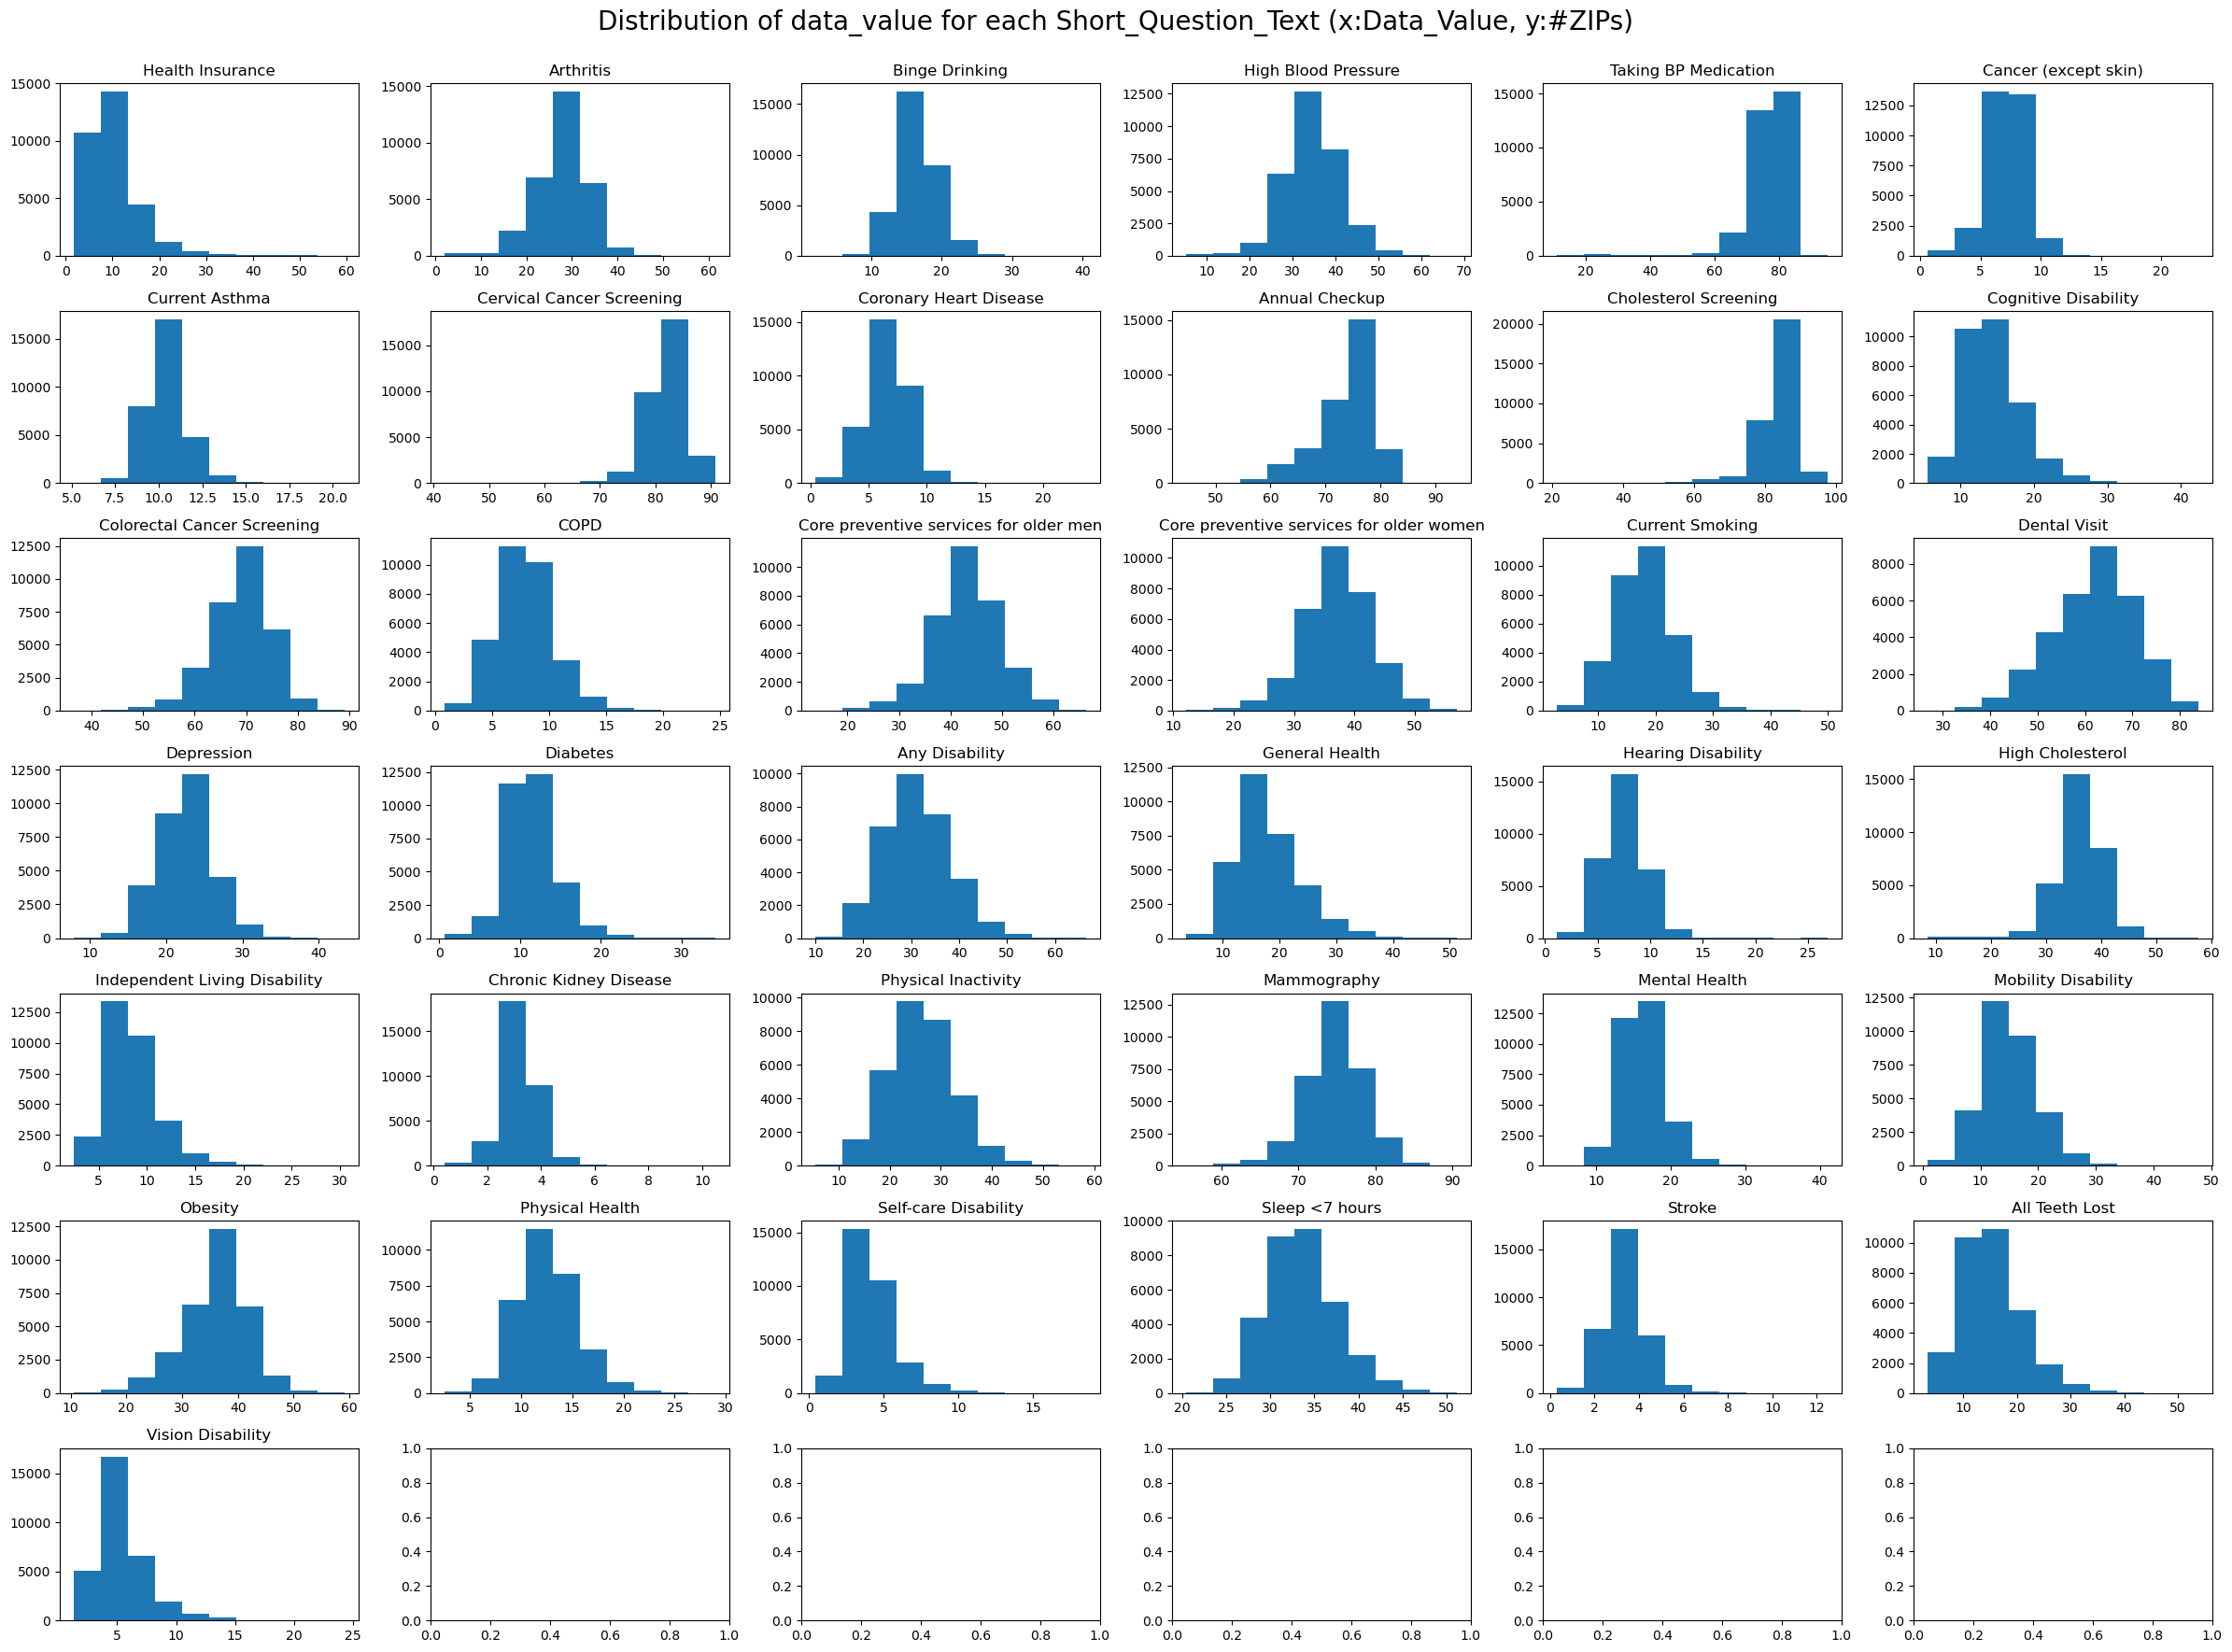

In [73]:
#Histogram: Distribution of data_value for each Short_Question_Text
fig, ax = plt.subplots(7, 6, figsize=(24, 18))
r,c=0,0
for question in df_health_outcomes_edited['Short_Question_Text'].unique():
    try:
        ax[r,c].hist(df_health_outcomes_edited[df_health_outcomes_edited['Short_Question_Text']==question]['Data_Value'])
        ax[r,c].set_title(question, size=12)
        #ax[r,c].set_xlabel("Data_Value")
        #ax[r,c].set_ylabel("#ZIPs")
        if c<5:
            c+=1
        else:
            c=0
            r+=1
    except:
        print(f"Error at r:{r} and c:{c}")

plt.suptitle("Distribution of data_value for each Short_Question_Text (x:Data_Value, y:#ZIPs)", size=20)
fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show();

Insights:

<ol>
<li>Most of the measures seems to have good distribution and may be interesting to see how they interact (in terms of comorbidities).</li>
<li>However, there are some like "Taking BP medication" and "Cholesterol screening" where most of the ZIPs seem to fall in a narrow range..</li>
<li>Preventive services like "Core preventive services for older men/women" and "Dental visits" have a very wide spread.</li>
<li>It may be reasonable to think that many people view Preventive services as "optional" & more well to do localities may have better coverage. </li>
</ol>


###### Drawing map of ZIPs with information available.


In [13]:
df_health_outcomes_edited.sample(5)

,Year,ZIP,Category,Measure,Data_Value,TotalPopulation,Short_Question_Text,Geolocation,longitude,latitude
723823,2020,60804,Prevention,Older adult men aged >=65 years who are up to ...,32.800,84573,Core preventive services for older men,POINT (-87.76016689 41.8378105),-87.760,41.838
542388,2020,48096,Prevention,Cervical cancer screening among adult women ag...,86.300,3739,Cervical Cancer Screening,POINT (-82.92004128 42.76132361),-82.920,42.761
274822,2021,24931,Health Outcomes,Cancer (excluding skin cancer) among adults ag...,7.800,1544,Cancer (except skin),POINT (-80.59150339 37.91931396),-80.592,37.919
917675,2021,75433,Disability,Hearing disability among adults aged >=18 years,8.200,2773,Hearing Disability,POINT (-95.81498775 33.11000088),-95.815,33.110
87856,2020,08852,Prevention,Cervical cancer screening among adult women ag...,85.000,17220,Cervical Cancer Screening,POINT (-74.54848211 40.38778229),-74.548,40.388


In [17]:
df_combined.sample(5)

,ZIP,Estimate Households Total,Percent Households lt 10k,Estimate Households Median income (dollars),Estimate Families Total,Estimate Families Median income (dollars),Estimate Nonfamily households Total,Estimate Nonfamily households Median income (dollars),Percent Households that are Families,TotalPopulation_x,...,State Name,State,Political Affiliation (2008-2020 presidential elections),spend_2017,spend_2018,spend_2019,spend_2020,spend_2021,longitude,latitude
6452,20676,1164.000,0.700,161071.000,740.000,182543.000,424.000,86667.000,0.636,3871.000,...,Maryland,MD,Deep Blue,40.393,42.400,43.130,45.070,108.770,-76.571,38.476
35485,89154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nevada,NV,Deep Blue,6.754,8.490,10.760,12.190,13.520,NaN,NaN
32954,98038,12809.000,3.100,135304.000,10478.000,148900.000,2331.000,67485.000,0.818,31171.000,...,Washington,WA,Deep Blue,41.389,46.050,45.620,47.950,89.000,-121.877,47.444
3491,12836,266.000,0.000,84722.000,125.000,84375.000,141.000,84821.000,0.470,574.000,...,New York,NY,Deep Blue,86.813,83.990,83.210,84.870,92.440,-73.551,43.766
82,00777,13415.000,20.700,26052.000,9494.000,30973.000,3921.000,15497.000,0.708,NaN,...,Puerto Rico,PR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Showing ZIPs on a map. The method works but is very slow at ZIP level.
import folium
# Generate a Folium map with center coordinates (0, 0)
this_map = folium.Map(location=[44.6, -103.5], zoom_start=3)
# Locate the coordinates 0, 0

counter=0
for lat, long, isnullchk in list(zip(df_combined['latitude'], df_combined['longitude'], df_combined.latitude.isnull())):
    if not(isnullchk) and counter<10:
        folium.Marker([lat, long]).add_to(this_map)
        counter+=1

# Display the map
this_map